## Машина опорних векторів (SVM)

In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings('ignore')

from scipy.io import loadmat
from sklearn.svm import SVC

%matplotlib inline

In [2]:
def plotData(X, y):
    plt.figure(figsize=(8, 6))
    pos = (y == 1).ravel()
    neg = (y == 0).ravel()
    
    plt.scatter(X[pos,0], X[pos,1], s=60, c='green', marker='x', linewidths=2)
    plt.scatter(X[neg,0], X[neg,1], s=60, c='darkorange', marker='o', linewidths=2)

In [3]:
def plot_svc(svc, X, y, h=0.02, pad=0.25):
    plt.figure(figsize=(8, 6))
    x_min, x_max = X[:, 0].min()-pad, X[:, 0].max()+pad
    y_min, y_max = X[:, 1].min()-pad, X[:, 1].max()+pad
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.2)

    pos = (y == 1).ravel()
    neg = (y == 0).ravel()
    plt.scatter(X[pos,0], X[pos,1], s=60, c='green', marker='x', linewidths=2)
    plt.scatter(X[neg,0], X[neg,1], s=60, c='darkorange', marker='o', linewidths=2)
    
    sv = svc.support_vectors_
    plt.scatter(sv[:,0], sv[:,1], c='k', marker='|', s=100, linewidths='1')
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.show()
    print('Number of support vectors: ', svc.support_.size)

In [4]:
# Завантажуємо датасет 1.
data1 = loadmat('data1.mat')

In [5]:
y1 = data1['y']
X1 = data1['X']

print('X1:', X1.shape)
print('y1:', y1.shape)

X1: (51, 2)
y1: (51, 1)


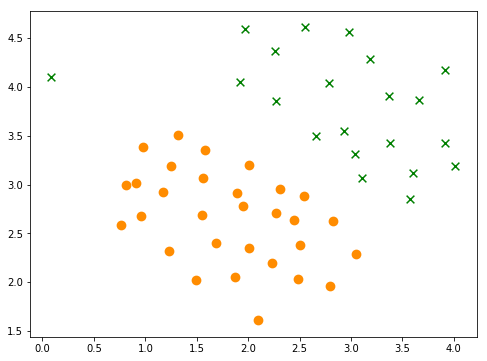

In [6]:
# Завантажені дані є майже лінійнороздільними, але містять один викид.
plotData(X1, y1)

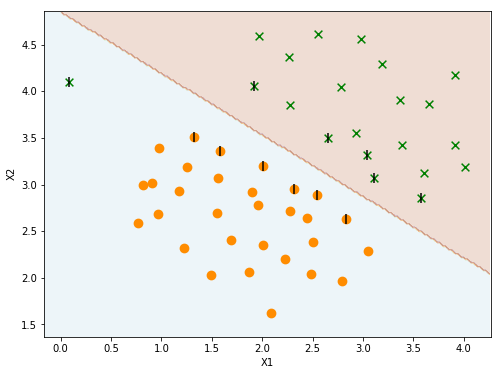

Number of support vectors:  12


In [15]:
# Навчимо SVM на наведеному датасеті, використовуючи мале значення гіперпараметра C. Якою є отримана роздільна гіперплощина?
clf = SVC(C=1, kernel='linear')
clf.fit(X1, y1.ravel())
plot_svc(clf, X1, y1)

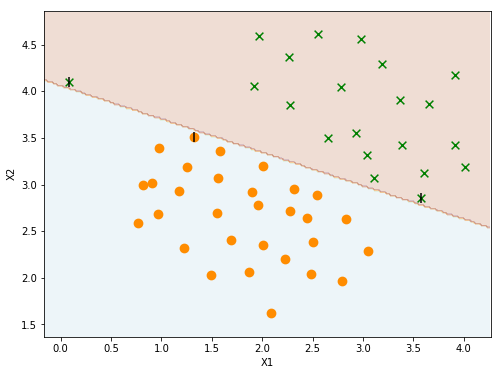

Number of support vectors:  3


In [16]:
# Навчимо SVM на наведеному датасеті, використовуючи велике значення гіперпараметра C. Що змінилось?
clf.set_params(C=100)
clf.fit(X1, y1.ravel())
plot_svc(clf, X1, y1)

In [17]:
# Завантажуємо датасет 2.
data2 = loadmat('data2.mat')

In [18]:
y2 = data2['y']
X2 = data2['X']

print('X2:', X2.shape)
print('y2:', y2.shape)

X2: (863, 2)
y2: (863, 1)


In [ ]:
plotData(X2, y2)

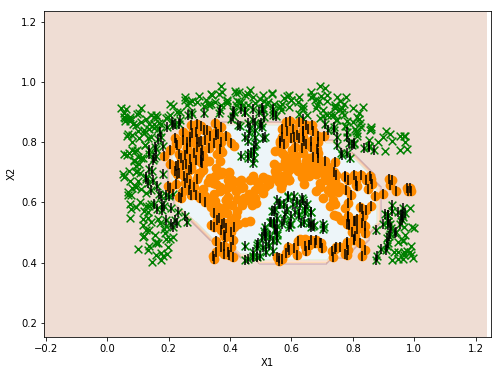

Number of support vectors:  439


In [21]:
# Підберіть значення гіперпараметра C таким чином, щоб отримати оптимальну роздільну гіперплощину - робастну і не перенавчену.
# Також змініть значення параметра kernel (для використання лінійного ядра (тобто чиста SVM, без ядер) встановіть
# значення 'linear', для використання гаусового ядра встановіть значення 'rbf', для використання поліноміального ядра
# встановіть значення 'poly', та зазначте додатковий агрумент degree, що відповідатиме максимальному степеню
# поліноміального ядра)
clf2 = SVC(C=100, kernel='rbf')
clf2.fit(X2, y2.ravel())
plot_svc(clf2, X2, y2)

In [22]:
# Завантажуємо датасет 3.
data3 = loadmat('data3.mat')

In [23]:
y3 = data3['y']
X3 = data3['X']

print('X3:', X3.shape)
print('y3:', y3.shape)

X3: (211, 2)
y3: (211, 1)


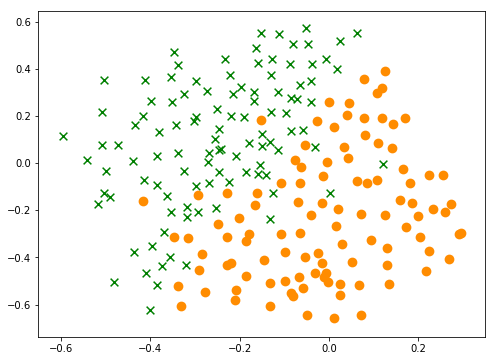

In [24]:
plotData(X3, y3)

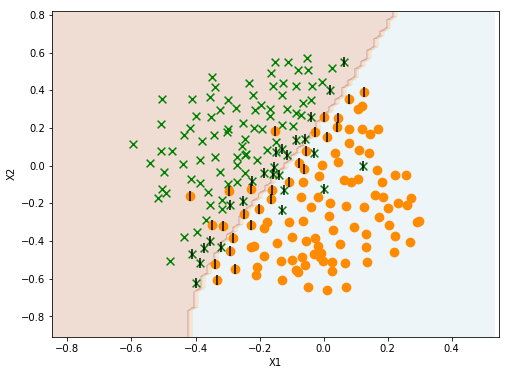

Number of support vectors:  53


In [25]:
# Підберіть значення гіперпараметра C таким чином, щоб отримати оптимальну роздільну гіперплощину - робастну і не перенавчену.
# Також змініть значення параметра kernel (для використання лінійного ядра (тобто чиста SVM, без ядер) встановіть
# значення 'linear', для використання гаусового ядра встановіть значення 'rbf', для використання поліноміального ядра
# встановіть значення 'poly', та зазначте додатковий агрумент degree, що відповідатиме максимальному степеню
# поліноміального ядра)
clf3 = SVC(C=100, kernel='rbf')
clf3.fit(X3, y3.ravel())
plot_svc(clf3, X3, y3)